{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

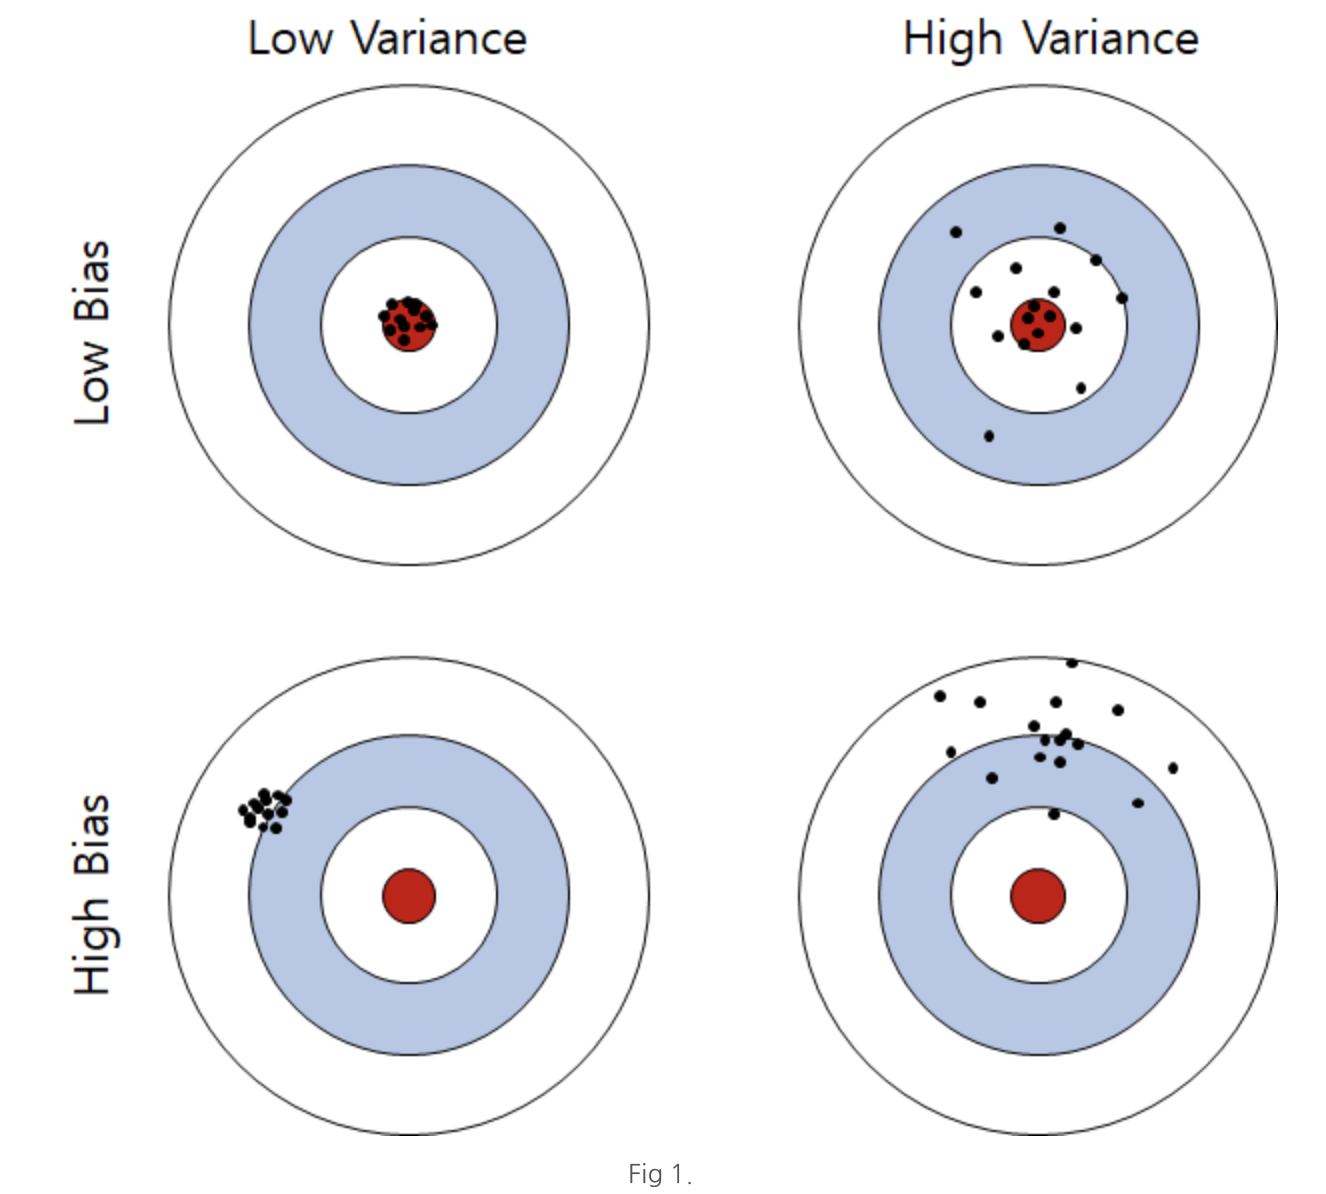
1. Variance : 데이터가 퍼짐정도
2. Bias : 데이터가 어느부분에 편향되어있는 정도 

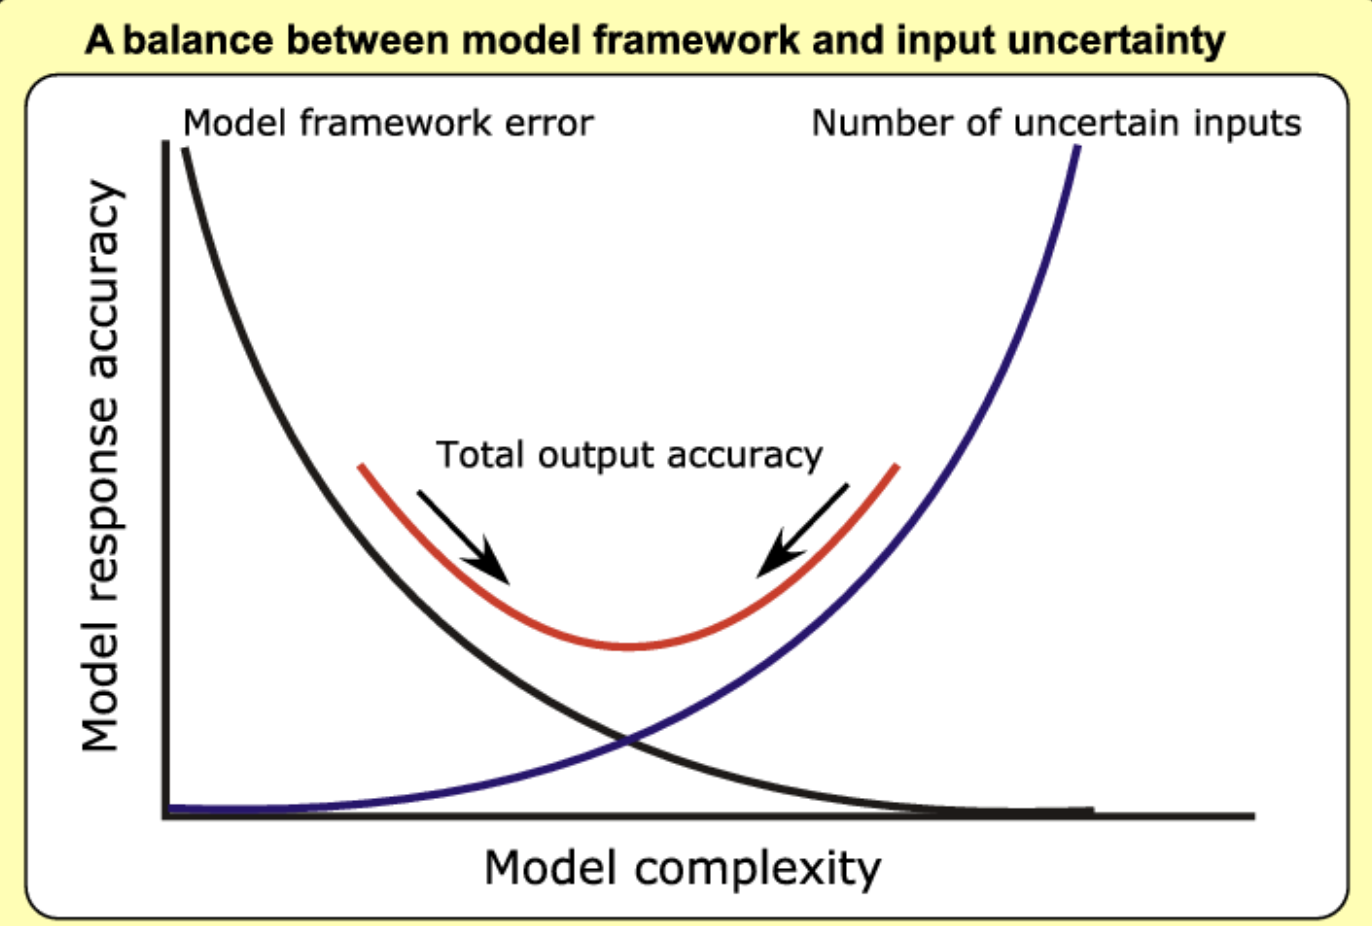
1. OverFitting : 학습데이터를 가지고 과도하게 학습이 되어 학습데이터에는 좋은 성능을 보이지만 새로운 데이터셋에서는 좋지못한 성능을 보이는 상태이며 일반화에 문제가 존재
2. UnderFitting : 학습데이터를 가지고 너무 적게 학습이 되어 학습데이터에도 좋지못한 성능을 보이는 상태로써 UnderFitting또한 일반화에 문제가 존재

### Naive Bayes Classifier

1. ML 중 지도학습으로 분류의 목적 
2. 속성들 사이의 독립을 가정하는 베이즈정리를 적용한 확률적 분류 기법 
3. 조건부확률이라고 생각 
4. 사전확률 : 가지고 있는 정보를 기초로 정한 초기 확률 
5. 사후확률 : 결과가 발생했다는 조건에서 어떤 원인이 발생했을 확률 
6. 우도(Likilihood) : 원인이 발생했다는 조건에서 결과가 발생했을 확률  

베이즈정리 
1. 조건부확률 p(B|A) : 사건 A가 발생했을때를 가정했을때 사건B가 발생할 확률 
2. 만약 A와 B가 독립이면 A와 B의 교집합은 P(A)와 P(B)의 곱

In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#GaussainNB는 정규분포를 가정한다고 생각하면 됨 
import pandas as pd
import numpy as np

In [2]:
tennis_data = pd.read_csv('/Users/Moon/Desktop/Summer/Machin Learning/ML_200722/playtennis.csv')
print(tennis_data.head())

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3      Rain        Mild     High    Weak        Yes
4      Rain        Cool   Normal    Weak        Yes


In [3]:
tennis_data.Outlook = tennis_data.Outlook.replace('Sunny', 0)
tennis_data.Outlook = tennis_data.Outlook.replace('Overcast', 1)
tennis_data.Outlook = tennis_data.Outlook.replace('Rain', 2)

tennis_data.Temperature = tennis_data.Temperature.replace('Hot', 3)
tennis_data.Temperature = tennis_data.Temperature.replace('Mild', 4)
tennis_data.Temperature = tennis_data.Temperature.replace('Cool', 5)

tennis_data.Humidity = tennis_data.Humidity.replace('High', 6)
tennis_data.Humidity = tennis_data.Humidity.replace('Normal', 7)

tennis_data.Wind = tennis_data.Wind.replace('Weak', 8)
tennis_data.Wind = tennis_data.Wind.replace('Strong', 9)

tennis_data.PlayTennis = tennis_data.PlayTennis.replace('No', 10)
tennis_data.PlayTennis = tennis_data.PlayTennis.replace('Yes', 11)

tennis_data

#데이터에 존재하는 모든 문자열을 숫자타입으로 변환

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,3,6,8,10
1,0,3,6,9,10
2,1,3,6,8,11
3,2,4,6,8,11
4,2,5,7,8,11
5,2,5,7,9,10
6,1,5,7,9,11
7,0,4,6,8,10
8,0,5,7,8,11
9,2,4,7,8,11


In [4]:
tennis_data.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'PlayTennis'], dtype='object')

In [5]:
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook', 'Temperature', 'Humidity', 'Wind']))
y = np.array(pd.DataFrame(tennis_data, columns = ['PlayTennis']))
#독립변수(X)와 종속변수(y)를 지정 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
#train과 test로 분리 

In [7]:
X_train

array([[2, 4, 7, 8],
       [0, 3, 6, 9],
       [2, 5, 7, 8],
       [1, 5, 7, 9],
       [1, 3, 7, 8],
       [0, 3, 6, 8],
       [0, 4, 7, 9],
       [1, 3, 6, 8],
       [2, 4, 6, 8],
       [2, 4, 6, 9]])

In [8]:
gnb_clf = GaussianNB()
gnb_clf = gnb_clf.fit(X_train, y_train)
#가우시안분류기에 train을 넣어서 학습

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
gnb_prediction = gnb_clf.predict(X_test)
print(gnb_prediction)
#X_test를 통해 y를 예측 

[11 10 10 11]


In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [11]:
print('Confusion Matrix')
print(confusion_matrix(y_test, gnb_prediction))

Confusion Matrix
[[1 1]
 [1 1]]


In [12]:
print('Classification Report')
print(classification_report(y_test, gnb_prediction))
#성능이 아주 좋지 못하다 
#개별 파라미터의 조정이 필요 

Classification Report
              precision    recall  f1-score   support

          10       0.50      0.50      0.50         2
          11       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



In [13]:
fmeasure = round(f1_score(y_test, gnb_prediction, average = 'weighted'),2)
accuracy = round(accuracy_score(y_test, gnb_prediction, normalize = True),2)

In [14]:
df_nbclf = pd.DataFrame(columns = ['Classifier', 'F-Measure', 'Accuracy'])
df_nbclf.loc[len(df_nbclf)] = ['Naive Bayes', fmeasure, accuracy]
df_nbclf
#Accuracy가 50%이면 해당 모델은 거의 찍고 있다고 보면 됨
#나이브베이즈모델이 제대로 작동을 하지 않는다고 할 수 있음 

,Classifier,F-Measure,Accuracy
0,Naive Bayes,0.5,0.5


### Iris Data Set

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
iris = sns.load_dataset('iris')
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### ============== 연습문제 ===================

In [41]:
iris = pd.DataFrame(iris)
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


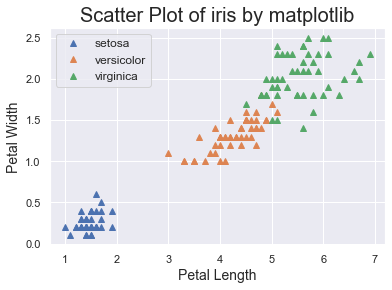

In [49]:
groups = iris.groupby('species')

fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.petal_length, group.petal_width,  marker='^', linestyle='',label=name)

ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)

plt.xlabel('Petal Length', fontsize=14)

plt.ylabel('Petal Width', fontsize=14)

plt.show()


### ============== 연습문제 ===================

/Users/Moon/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


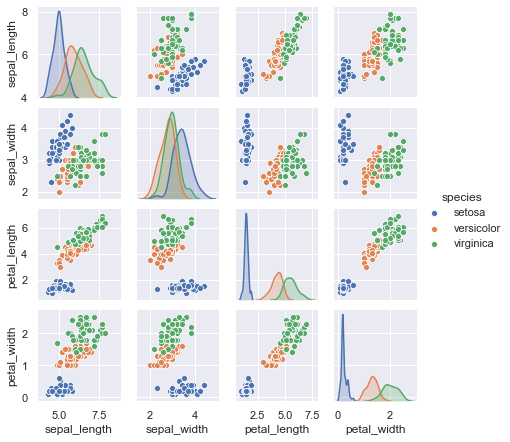

In [43]:
%matplotlib inline
sns.set()
sns.pairplot(iris, hue = 'species', size = 1.5)
#대략적인 시각자료를 보여줌 

In [18]:
iris.corr()
#몇몇변수들은 높은 상관계수를 보여주고 있음

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [19]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

In [20]:
y_iris = iris['species']
y_iris.shape
#반응변수가 시리즈형태임 

(150,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 4)

In [22]:
model = GaussianNB()
model.fit(X_train, y_train)
#가우시안모델에 학습데이터로 학습 

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_model = model.predict(X_test)
#테스트데이터로 추정값 도출 

In [24]:
a = accuracy_score(y_test,y_model)
#실제값과 추정값을 통해 Accuracy를 도출 
print('해당 모델의 정확도: ',round(a,4)*100,'%')

해당 모델의 정확도:  97.37 %


### KNN(K-Nearest Neighbor)

In [25]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [26]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [27]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)
#KNN모델 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
y_pred = clf.predict(X)
print(y_pred)
#추정값들 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 2 1]


In [29]:
confusion_matrix(y,y_pred)
#열과 행이 3개인 confusion matrix
#2*2matrix만 있는게 아니고 해당 데이터의 라벨값에 따라 confusion matrix의 크기가 결정
#https://qastack.kr/stats/91044/how-to-calculate-precision-and-recall-in-a-3-x-3-confusion-matrix <- 참고

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]])

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
k_range= range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())
    
#cross_validation함수 사용 
#k값이 1~100까지 임으로 k값이 계속 바뀌면서 분류기를 돌려서 나온 accuracy를 k_scores에 넣는다

In [32]:
print(k_scores)
#위의 코드를 사용하면 가장 좋은 결과치를 보여주는 k값을 보여줌 
print('가장 큰 값 : ',max(k_scores))

[0.7266666666666668, 0.7066666666666667, 0.74, 0.7, 0.7466666666666667, 0.7666666666666668, 0.78, 0.7733333333333334, 0.7866666666666667, 0.7666666666666667, 0.78, 0.7733333333333334, 0.7733333333333333, 0.7533333333333334, 0.7733333333333333, 0.7666666666666667, 0.7933333333333333, 0.7933333333333333, 0.7933333333333333, 0.78, 0.7866666666666666, 0.7933333333333334, 0.8000000000000002, 0.7933333333333334, 0.8000000000000002, 0.7933333333333332, 0.7933333333333332, 0.7866666666666666, 0.7999999999999999, 0.7999999999999999, 0.7999999999999999, 0.78, 0.8066666666666669, 0.8066666666666669, 0.8133333333333335, 0.7933333333333334, 0.8000000000000002, 0.7933333333333332, 0.8066666666666669, 0.8066666666666669, 0.8066666666666669, 0.8133333333333335, 0.8200000000000001, 0.8200000000000001, 0.8200000000000001, 0.8200000000000001, 0.8133333333333335, 0.8133333333333335, 0.8133333333333335, 0.8066666666666669, 0.8066666666666669, 0.7999999999999999, 0.7999999999999999, 0.8, 0.8066666666666666,

과제 : 각 클래스를 색깔별로 산점도를 그려라